In [358]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

%matplotlib inline

In [359]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Belle_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_BlackRock_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Cottonwood_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_HiddenValley_since1993_int.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_IndianCove_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_JumboRocks_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)
data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_Ryan_since1993.csv", parse_dates=['monthyear'], index_col='monthyear') # date_parser = dateparse)
#data = pd.read_csv("~/Downloads/JTNP_camping_data/JTNP_WhiteTank_since1993.csv")# parse_dates=['monthyear'], index_col='monthyear', date_parser = dateparse)


series = data['occupancyRate2']

In [361]:
data

,index,timeIndex,Group.Description,Campground,This.Month,month,year,monthNum,daysPerMonth,numCamps,totalPossOccupant,occupancyRate,occupancyRate2
monthyear,,,,,,,,,,,,,
1993-01-01,855,7,Tent Sites Occupied,Ryan,430,Jan,1993,1,31,31,961,0.447451,0.447451
1993-02-01,639,15,Tent Sites Occupied,Ryan,367,Feb,1993,2,28,31,868,0.422811,0.422811
1993-03-01,1503,23,Tent Sites Occupied,Ryan,745,Mar,1993,3,31,31,961,0.775234,0.775234
1993-04-01,7,31,Tent Sites Occupied,Ryan,850,Apr,1993,4,30,31,930,0.913978,0.913978
1993-05-01,1719,39,Tent Sites Occupied,Ryan,631,May,1993,5,31,31,961,0.656608,0.656608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,1711,2519,Tent Sites Occupied,Ryan,630,Mar,2019,3,31,31,961,0.655567,0.655567
2019-04-01,215,2527,Tent Sites Occupied,Ryan,588,Apr,2019,4,30,31,930,0.632258,0.632258
2019-05-01,1927,2535,Tent Sites Occupied,Ryan,506,May,2019,5,31,31,961,0.526535,0.526535


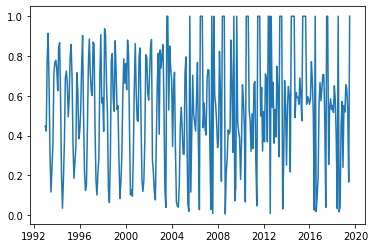

In [362]:
plt.plot(series)

In [363]:
# Setting the training and testing split

percent_training = 0.70
split_point = round(len(series) * percent_training)
training, testing = series[0:split_point], series[split_point:]

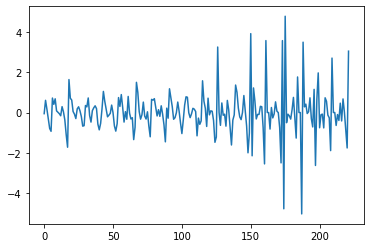

In [364]:
# Because the series is multiplicative, apply a log transform
training = np.log(training)

# Adjust for linear trend
training_diff = training.diff(periods = 1).values[1:]

# Plot the residual log-differenced series
plt.plot(training_diff)

//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
//anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


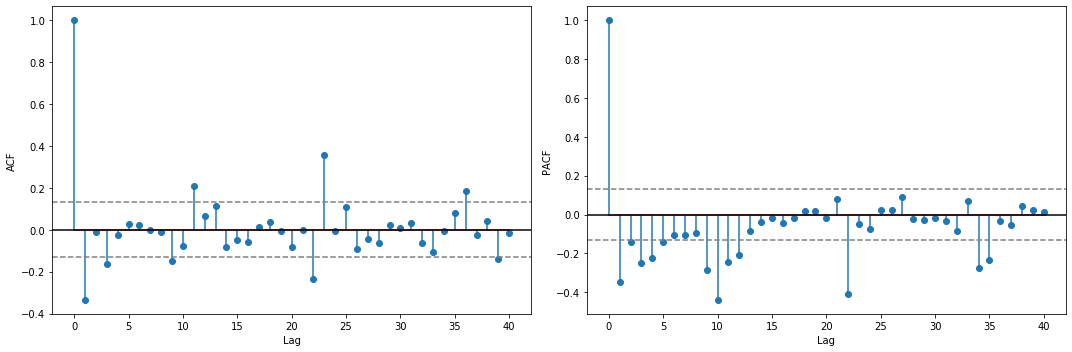

In [365]:
# to take out the seasonality, import the acf/pacf functions
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training_diff, nlags = 40)
lag_pacf = pacf(training_diff, nlags = 40, method = 'ols')

# Plot ACF
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

# Plot PACF
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0, linestyle = '-', color='black')
plt.axhline(y = -1.96/np.sqrt(len(training)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(training)),linestyle = '--', color = 'gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [322]:
# SARIMA model parameters: (p,d,q)(P,D,Q,S)

# p is equal to the first lag where the PACF value is above the significance level
# d: 0 = no trend; 1 = constant trend, 2 = time-dependent trend
# q is equal to the first lag where the ACF value is above the significance level.
# P should be 1 or higher if ACF is POSITIVE at lag S, otherwise = 0.
# D: 0 = no stable seasonal pattern, 1 = stable seasonal pattern (d + D should be <= 2)
# Q should be 1 or higher if ACF is NEGATIVE at lag S, otherwise = 0. (P + Q should be <= 2)
# S is the ACF with the highest lag (seasonality)

In [376]:
# Creating a SARIMA model
# Note that the input in 'training', not 'training_diff'. If you do use training_diff, set d = 0
model = SARIMAX(training, order = (1,0,1), seasonal_order = (2,1,0,12), enforce_stationarity = False, enforce_invertibility = False)
model_fit = model.fit(disp=False) # extract the fitted model
print(model_fit.summary())

//anaconda3/envs/insight/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                     occupancyRate2   No. Observations:                  223
Model:             SARIMAX(1, 0, 1)x(2, 1, 0, 12)   Log Likelihood                -232.502
Date:                            Tue, 24 Sep 2019   AIC                            475.003
Time:                                    11:16:33   BIC                            491.132
Sample:                                01-01-1993   HQIC                           481.539
                                     - 07-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5207      0.452      1.152      0.249      -0.365       1.407
ma.L1         -0.6046      0.432   

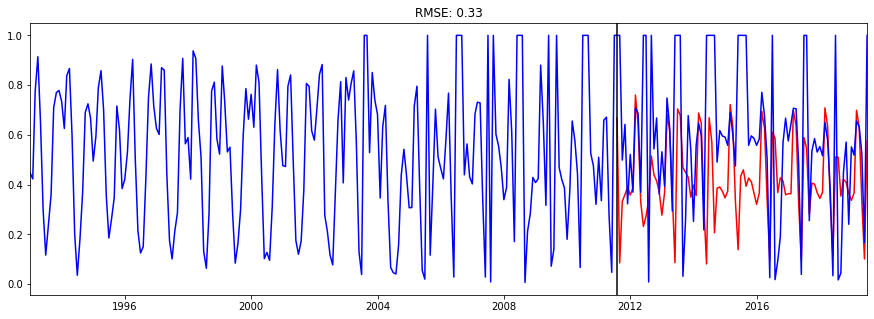

In [377]:
# Now we can forecast
K = len(testing) # number of future steps we want to forecast
forecast = model_fit.forecast(K) # apply the forecast model out to K steps
forecast = np.exp(forecast) # transform back to non-log scale

# Plot results and display RMSE
plt.figure(figsize=(15,5))
plt.plot(forecast,'r');
plt.plot(series,'b');
plt.title('RMSE: %.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.autoscale(enable=True, axis='x', tight=True)
plt.axvline(x=series.index[split_point],color='black');


In [ ]:
# Belle (1,1,1) (1,1,0,12)
# Black Rock (1,1,1) (1,1,0,12)
# Cottonwood (1,0,1) (1,1,0,12)
# Hidden Valley (1,0,1) (1,1,0,12)
# Indian Cove (1,1,1) (1,1,0,12)
# Jumbo Rocks (1,0,1) (1,0,0,12)
# Ryan (1,1,1) (1,1,0,12)
# White Tank (1,0,1) (2,1,0,12)